In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

Dataset yang didapat merupakan timeseries dataset dari https://github.com/as6140/hdi_v_ecology_plotly_blog. Dataset yang didapat relatif sudah clean, karena sudah melalui sejumlah tahapan Preprocessing, seperti imputasi data null dan pembersihan duplicate.


### I.IMPOR DATA DAN HAPUS DATA DUPLIKAT

In [2]:
def importData(filename):
    """
    Fungsi untuk import data & hapus duplikat
    :param filename: <string> nama file input (format .csv)
    :return df: <pandas dataframe> sampel data
    """

    # read data
    df = pd.read_csv(filename)
    print("Data asli            : ", df.shape, "- (#observasi, #kolom)")

    # drop duplicates
    df = df.drop_duplicates()
    print("Data setelah di-drop : ", df.shape, "- (#observasi, #kolom)")

    return df

# (filename) adalah argumen
# Argumen adalah sebuah variable. 
# Jika fungsi tsb. diberi argumen filename = "bank_data.csv", 
# maka semua variabel 'filename' di dalam fungsi 
# akan berubah menjadi "bank_data.csv"


In [3]:
data = 'data_for_plotly_grid.csv'

In [4]:
footprint = importData(filename = data)

Data asli            :  (2157, 11) - (#observasi, #kolom)
Data setelah di-drop :  (2157, 11) - (#observasi, #kolom)


In [5]:
footprint.head()

,Unnamed: 0,country,year,hdi,life_expectancy,population,continent,EFConsPerCap,EFConsTotGHA,BiocapPerCap,BiocapTotGHA
0,0,Afghanistan,2000,0.340,55.482,20093756.0,Asia,0.648085,12768498.74,0.509767,10043372.21
1,1,Afghanistan,2001,0.341,56.044,20966463.0,Asia,0.605820,12438205.89,0.500063,10266894.13
2,2,Afghanistan,2002,0.373,56.637,21979923.0,Asia,0.704061,15128227.46,0.570591,12260349.44
3,3,Afghanistan,2003,0.381,57.250,23064851.0,Asia,0.708856,15954511.65,0.591033,13302606.63
4,4,Afghanistan,2004,0.396,57.875,24118979.0,Asia,0.619414,14556109.86,0.502825,11816295.92


Melakukan sanity check pada dataset sebelum melakukan pre-processing. Dengan tahapan sebagai berikut:

1. Pengecekan statistik data pada kolom
2. Pengecekan tipe data pada kolom
3. Pengecekan null data

In [6]:
#statistik kolom

footprint.describe(include='all')

,Unnamed: 0,country,year,hdi,life_expectancy,population,continent,EFConsPerCap,EFConsTotGHA,BiocapPerCap,BiocapTotGHA
count,2157.000000,2157,2157.000000,2157.000000,2157.000000,2.157000e+03,2157,2157.000000,2.157000e+03,2157.000000,2.157000e+03
unique,NaN,146,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,NaN,Afghanistan,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN
freq,NaN,15,NaN,NaN,NaN,NaN,630,NaN,NaN,NaN,NaN
mean,1078.000000,NaN,2007.013445,0.663868,68.963548,4.149857e+07,NaN,3.332793,1.135235e+08,3.480864,7.334822e+07
std,622.816586,NaN,4.320348,0.168760,9.531841,1.497885e+08,NaN,2.636035,4.232561e+08,7.059596,2.138697e+08
min,0.000000,NaN,2000.000000,0.255000,38.702000,9.808200e+04,NaN,0.428228,1.800502e+05,0.033138,4.645019e+04
25%,539.000000,NaN,2003.000000,0.520000,62.501000,3.605439e+06,NaN,1.401618,8.442695e+06,0.771566,5.290507e+06
50%,1078.000000,NaN,2007.000000,0.692000,71.658537,9.474511e+06,NaN,2.402041,2.254306e+07,1.570229,1.714351e+07
75%,1617.000000,NaN,2011.000000,0.798000,75.932000,2.700843e+07,NaN,4.716975,6.294436e+07,3.128630,5.485825e+07


In [7]:
#tipe data tiap kolom

footprint.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2156
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2157 non-null   int64  
 1   country          2157 non-null   object 
 2   year             2157 non-null   int64  
 3   hdi              2157 non-null   float64
 4   life_expectancy  2157 non-null   float64
 5   population       2157 non-null   float64
 6   continent        2157 non-null   object 
 7   EFConsPerCap     2157 non-null   float64
 8   EFConsTotGHA     2157 non-null   float64
 9   BiocapPerCap     2157 non-null   float64
 10  BiocapTotGHA     2157 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 202.2+ KB


In [8]:
#persentase data null

persentase_isnull = footprint.isnull().sum()*100/len(footprint)
persentase_isnull

Unnamed: 0         0.0
country            0.0
year               0.0
hdi                0.0
life_expectancy    0.0
population         0.0
continent          0.0
EFConsPerCap       0.0
EFConsTotGHA       0.0
BiocapPerCap       0.0
BiocapTotGHA       0.0
dtype: float64

Dari dataset di atas tidak ditemukan adanya data null

### II.DROP KOLOM YANG TIDAK DIGUNAKAN

In [9]:
#Drop kolom yang tidak digunakan sebagai input
footprint.drop(['Unnamed: 0', 'year', 
                'population', 'country',
               'life_expectancy'], 
               axis=1, inplace=True)


In [10]:
footprint.head()

,hdi,continent,EFConsPerCap,EFConsTotGHA,BiocapPerCap,BiocapTotGHA
0,0.340,Asia,0.648085,12768498.74,0.509767,10043372.21
1,0.341,Asia,0.605820,12438205.89,0.500063,10266894.13
2,0.373,Asia,0.704061,15128227.46,0.570591,12260349.44
3,0.381,Asia,0.708856,15954511.65,0.591033,13302606.63
4,0.396,Asia,0.619414,14556109.86,0.502825,11816295.92


In [11]:
#cek dimensi

footprint.shape

(2157, 6)

### III.DATA PREPROCESSING

#### **3.1. Pemisahan input dan output pada dataset**

In [12]:
def extractInputOutput(data,
                       output_column_name):
    """
    Fungsi untuk memisahkan data input dan output
    :param data: <pandas dataframe> data seluruh sample
    :param output_column_name: <string> nama kolom output
    :return input_data: <pandas dataframe> data input
    :return output_data: <pandas series> data output
    """
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

# (data, output_column_name) adalah argumen
# Argumen adalah sebuah variable. 
# Jika fungsi tsb. diberi argumen data = footprint, 
# maka semua variabel 'data' di dalam fungsi akan berubah menjadi footprint

In [13]:
# Jangan sampai salah urutan dalam penempatan return
X, y = extractInputOutput(data = footprint,
                          output_column_name = ["EFConsPerCap", "EFConsTotGHA", 
                                                "BiocapPerCap", "BiocapTotGHA" ])

Melakukan sanity check

In [14]:
X.head()

,hdi,continent
0,0.340,Asia
1,0.341,Asia
2,0.373,Asia
3,0.381,Asia
4,0.396,Asia


In [15]:
y.head()

,EFConsPerCap,EFConsTotGHA,BiocapPerCap,BiocapTotGHA
0,0.648085,12768498.74,0.509767,10043372.21
1,0.605820,12438205.89,0.500063,10266894.13
2,0.704061,15128227.46,0.570591,12260349.44
3,0.708856,15954511.65,0.591033,13302606.63
4,0.619414,14556109.86,0.502825,11816295.92


In [16]:
X.shape, y.shape

((2157, 2), (2157, 4))

#### **3.2. Splitting dataset**

Melakukan splitting data menjadi data training dan data test.

In [18]:
#Memisahkan data dengan dengan jumlah tes data sebesar 20%

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [19]:
#sanity check

X_train.head()

,hdi,continent
1476,0.797,Asia
2076,0.907,North America
693,0.852,Europe
679,0.869,Europe
810,0.613,South America


In [16]:
X_test.head()

,hdi,continent
746,0.924,Europe
1677,0.381,Africa
1858,0.890,Europe
1657,0.698,Oceania
479,0.459,Africa


In [17]:
y_train.head()

,EFConsPerCap,EFConsTotGHA,BiocapPerCap,BiocapTotGHA
1476,5.614577,1.652791e+07,2.127948,6.264147e+06
2076,8.576941,2.635111e+09,3.743064,1.149989e+09
693,5.496209,3.303683e+08,3.027679,1.819889e+08
679,7.184070,3.745630e+07,13.783007,7.186184e+07
810,2.497830,1.854731e+06,72.262349,5.365747e+07


In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1725, 2), (432, 2), (1725, 4), (432, 4))

#### **3.3. Processing Data Kategorikal**

Transformasi data kategorikal menjadi numerikal dengan menggunakan metode One Hot Encoding.

In [20]:
#Fungsi imputasi data kategorikal yang berisi null

def categoricalImputation(data, categorical_column):
    """
    Fungsi untuk melakukan imputasi data kategorik
    :param data: <pandas dataframe> sample data input
    :param categorical_column: <list> list kolom kategorikal data
    :return categorical_data: <pandas dataframe> data kategorikal
    """
    # seleksi data
    categorical_data = data[categorical_column]

    # lakukan imputasi
    categorical_data = categorical_data.fillna(value="KOSONG")

    return categorical_data

In [21]:
#Membuat fungsi untuk mentransformasi data kategorikal 

def extractCategorical(data, categorical_column):
    """
    Fungsi untuk ekstrak data kategorikal dengan One Hot Encoding
    :param data: <pandas dataframe> data sample
    :param categorical_column: <list> list kolom kategorik
    :return categorical_ohe: <pandas dataframe> data sample dengan ohe
    """
    data_categorical = categoricalImputation(data = data,
                                             categorical_column = categorical_column)
    categorical_ohe = pd.get_dummies(data_categorical)

    return categorical_ohe

In [22]:
# Transformasi data kategorikal dengan menggunakan fungsi di atas

X_train_categorical_ohe = extractCategorical(data = X_train,
                                             categorical_column = ['continent'])
X_train_categorical_ohe.head()


,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
1476,0,1,0,0,0,0
2076,0,0,0,1,0,0
693,0,0,1,0,0,0
679,0,0,1,0,0,0
810,0,0,0,0,0,1


In [22]:

X_train_categorical_ohe.shape

(1725, 6)

In [64]:
#Simpan nama kolom yang telah ditansformasi 

ohe_columns = X_train_categorical_ohe.columns
ohe_columns

Index(['continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

#### **3.4. Processing data numerikal**

In [23]:
#Membuat fungsi imputasi pada data numerikal

from sklearn.impute import SimpleImputer

def numericalImputation(data, numerical_column):
    """
    Fungsi untuk melakukan imputasi data numerik
    :param data: <pandas dataframe> sample data input
    :param numerical_column: <list> list kolom numerik data
    :return X_train_numerical: <pandas dataframe> data numerik
    :return imputer_numerical: numerical imputer method
    """
    # Filter data numerik
    numerical_data = data[numerical_column]

    # Buat imputer
    imputer_numerical = SimpleImputer(missing_values = np.nan,
                                      strategy = "median")
    imputer_numerical.fit(numerical_data)

    # Transform
    imputed_data = imputer_numerical.transform(numerical_data)
    numerical_data_imputed = pd.DataFrame(imputed_data)

    numerical_data_imputed.columns = numerical_column
    numerical_data_imputed.index = numerical_data.index

    return numerical_data_imputed, imputer_numerical

In [24]:
# Input
numerical_column = ["hdi"]

# Imputation Numeric
X_train_numerical, imputer_numerical = numericalImputation(data = X_train,
                                                           numerical_column = numerical_column)



In [25]:
X_train_numerical.head()

,hdi
1476,0.797
2076,0.907
693,0.852
679,0.869
810,0.613


In [27]:
X_train_numerical.shape


(1725, 1)

#### **3.5. Penggabungan input kategorikal dan numerikal**

In [26]:
#Membuat variabel yang menggabungkan data kategorikal dan numerikal

X_train_concat = pd.concat([X_train_numerical,
                            X_train_categorical_ohe],
                           axis = 1)

In [29]:
X_train_concat.head()

,hdi,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
1476,0.797,0,1,0,0,0,0
2076,0.907,0,0,0,1,0,0
693,0.852,0,0,1,0,0,0
679,0.869,0,0,1,0,0,0
810,0.613,0,0,0,0,0,1


In [30]:
X_train_concat.shape

(1725, 7)

In [27]:
#cek duplikat

X_train_concat.duplicated()

1476    False
2076    False
693     False
679     False
810     False
        ...  
1638     True
1095    False
1130     True
1294    False
860     False
Length: 1725, dtype: bool

#### **3.6. Standarisasi Data**

Melakukan standarisasi data yang telah digabungkan.

In [28]:
# fungsi untuk melakukan standarisasi data

from sklearn.preprocessing import StandardScaler


def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [29]:
#Membuat standarized data dengan fungsi di atas

X_train_clean, standardizer = standardizerData(data = X_train_concat)

In [31]:
X_train_clean.head()

,hdi,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
1476,0.787931,-0.640676,1.865615,-0.586946,-0.343441,-0.240069,-0.273434
2076,1.437663,-0.640676,-0.536016,-0.586946,2.911704,-0.240069,-0.273434
693,1.112797,-0.640676,-0.536016,1.703736,-0.343441,-0.240069,-0.273434
679,1.213210,-0.640676,-0.536016,1.703736,-0.343441,-0.240069,-0.273434
810,-0.298894,-0.640676,-0.536016,-0.586946,-0.343441,-0.240069,3.657185


In [32]:
X_train_clean.shape

(1725, 7)

#### **3.7.Feature Engineering: Principal Component Analysis (PCA)**

In [33]:
from sklearn.decomposition import PCA

In [34]:
# Buat objek
pca_object = PCA(n_components = 5)

# Fit objek
pca_train_object = pca_object.fit(X_train_clean)
pca_train_object

PCA(n_components=5)

In [35]:
# Ekstrak principal components
pca_train_object.components_

# Baris 1 --> PC 1
# Baris 2 -->  PC 2
# Baris 3 --> PC 3
# Baris 4 -->  PC 4
# Baris 5 --> PC 5

array([[-0.63033234,  0.59674895, -0.04856585, -0.48648159, -0.06205153,
        -0.02188018, -0.05674253],
       [-0.01218745, -0.33865866,  0.79679653, -0.49344656,  0.06282786,
         0.03504844,  0.04014762],
       [ 0.020749  , -0.15755802, -0.35574443, -0.32839219,  0.77884599,
         0.20889923,  0.30018237],
       [ 0.0107065 , -0.05459341, -0.10752476, -0.11327609, -0.49657635,
         0.30455529,  0.79571973],
       [-0.00828529, -0.05504911, -0.04848429, -0.02692517, -0.11822415,
         0.8919725 , -0.42922414]])

In [36]:
# Ekstrak variance yang dijelaskan
pca_train_object.explained_variance_ratio_

array([0.30165722, 0.18751937, 0.16535326, 0.15560571, 0.15185974])

In [37]:
#generate dataframe dengan fitur dari PCA
X_train_pca = pca_object.transform(X_train_clean)
X_train_pca = pd.DataFrame(data = X_train_pca,
                                 columns = [f"PC-{i+1}" for i in range(5)],
                                 index = X_train.index)

X_train_pca.head()

,PC-1,PC-2,PC-3,PC-4,PC-5
1476,-0.641969,1.942540,-0.753360,-0.210847,-0.102077
2076,-1.136865,0.225524,2.649746,-1.562084,-0.375855
693,-1.844479,-1.105359,-0.644494,-0.208613,-0.050004
679,-1.907773,-1.106583,-0.642411,-0.207538,-0.050836
810,-0.063304,0.199979,1.258359,3.163423,-1.663747


### IV.TRAINING

Melakukan data training pada dataset input dan output dengan polynomial regression.

In [38]:
# Import library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import cross_val_score

In [39]:
#Membuat variabel untuk library polynomial
poly = PolynomialFeatures(degree=2, include_bias=False)

In [40]:
#membuat baseline
baseline_pred = np.mean(y_train['EFConsPerCap'])
print(baseline_pred)

3.3612194603049264


In [41]:
baseline_mse = mean_squared_error(y_train["EFConsPerCap"], 
                                  np.ones(len(y_train["EFConsPerCap"])) * baseline_pred)
print(baseline_mse)

7.270068272974851


In [42]:
#membuat model pipeline yang melakukan intersepsi regresi linear ke dalam regresi polinomial
model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression(fit_intercept=False))])

In [43]:
# Melakukan cross validation

scores_poly = cross_val_score(model, X_train_pca,y_train["EFConsPerCap"],scoring='neg_mean_squared_error',
                            cv = 5, n_jobs = -1)

In [44]:
scores_poly

array([-3.22797359, -2.79325424, -3.12339213, -2.83953113, -1.88736533])

In [81]:
np.mean(scores_poly)*-1

2.7743032824769385

In [45]:
#fitting model pipeline dengan data training
model.fit(X = X_train_pca,
       y = y_train["EFConsPerCap"])

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression(fit_intercept=False))])

In [46]:
#melakukan prediksi dengan model di atas
y_pred_poly = model.predict(X_train_pca)

In [47]:
y_pred_poly

array([5.93135205, 7.21233188, 5.78808313, ..., 5.18959865, 1.85733515,
       4.99323765])

In [48]:
#membuat dataframe summary komparasi antara hasil aktual dan prediksi
summary_train_pred = pd.DataFrame({"actual": y_train['EFConsPerCap'],
                                   "prediction": y_pred_poly})

summary_train_pred.head()

,actual,prediction
1476,5.614577,5.931352
2076,8.576941,7.212332
693,5.496209,5.788083
679,7.184070,6.172142
810,2.497830,2.196007


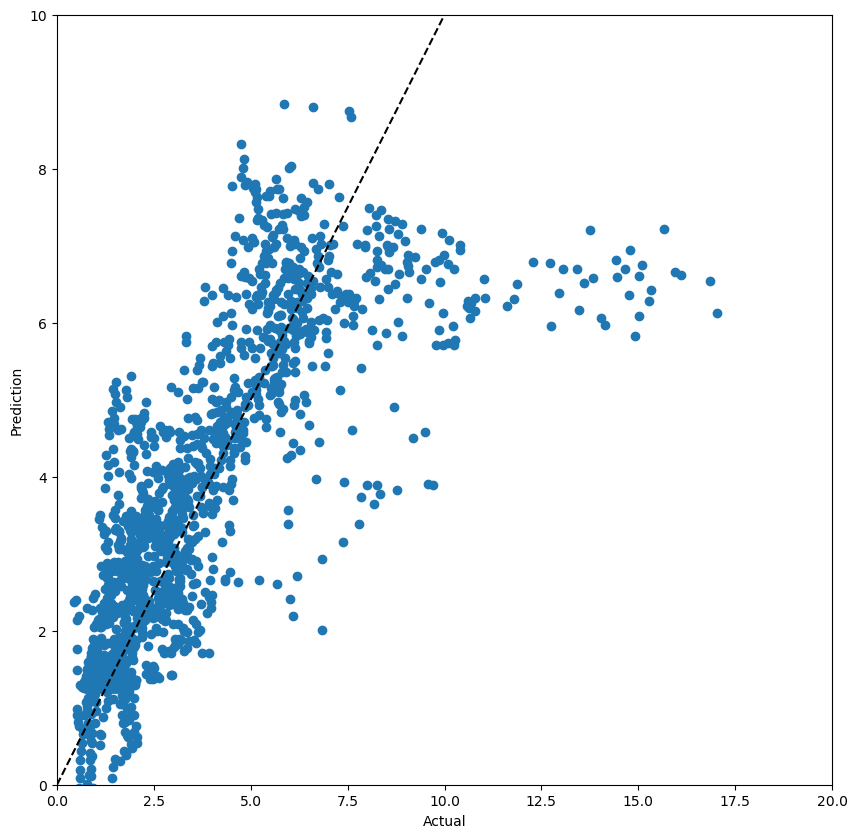

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(summary_train_pred["actual"], summary_train_pred["prediction"])
ax.plot([0, 30], [0, 30], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
plt.show()

In [50]:
#Melakukan analisis error

# Cari MSE
prediction_train_mse = mean_squared_error(y_pred_poly, y_train['EFConsPerCap'])
print(prediction_train_mse)

2.7331845481363963


In [51]:
# Cari perbandingan dengan baseline
comparison_mse = 100*(baseline_mse - prediction_train_mse) / baseline_mse
print(f"MSE turun {comparison_mse:.2f} %")

MSE turun 62.40 %


In [56]:
#menampilkan hasil regresi polinomial

#fitting dan transform data training
poly_features = poly.fit_transform(X_train_pca)

In [57]:
#fitting ke regresi linear
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train['EFConsPerCap'])

LinearRegression()

In [58]:
poly_reg_model.coef_

array([-7.01734619e+10,  2.30314834e+12, -1.44751723e+12,  1.26006117e+12,
       -4.59352183e+10,  4.27143562e+09,  1.19786440e+11,  3.13755304e+11,
        1.48683519e+08, -4.01963896e+10, -2.86730509e+12, -1.73634924e+11,
        4.53084371e+11, -5.27055045e+11,  3.81851807e+12,  3.27135119e+12,
       -2.61713715e+11, -3.61016725e+12, -1.81561657e+12,  4.15878127e+11])

In [59]:
poly_reg_model.intercept_

2825128632905.5366

### V.MELAKUKAN PREDIKSI

#### **5.1.Preprocessing Data Pengetesan**

In [62]:
def extractTest(data,
                numerical_column, categorical_column, ohe_column,
                imputer_numerical, standardizer):
    """
    Fungsi untuk mengekstrak & membersihkan test data 
    :param data: <pandas dataframe> sampel data test
    :param numerical_column: <list> kolom numerik
    :param categorical_column: <list> kolom kategorik
    :param ohe_column: <list> kolom one-hot-encoding dari data kategorik
    :param imputer_numerical: <sklearn method> imputer data numerik
    :param standardizer: <sklearn method> standardizer data
    :return cleaned_data: <pandas dataframe> data final
    """
    # Filter data
    numerical_data = data[numerical_column]
    categorical_data = data[categorical_column]

    # Proses data numerik
    numerical_data = pd.DataFrame(imputer_numerical.transform(numerical_data))
    numerical_data.columns = numerical_column
    numerical_data.index = data.index

    # Proses data kategorik
    categorical_data = categorical_data.fillna(value="KOSONG")
    categorical_data.index = data.index
    categorical_data = pd.get_dummies(categorical_data)
    categorical_data.reindex(index = categorical_data.index, 
                             columns = ohe_column)

    # Gabungkan data
    concat_data = pd.concat([numerical_data, categorical_data],
                             axis = 1)
    cleaned_data = pd.DataFrame(standardizer.transform(concat_data))
    cleaned_data.columns = concat_data.columns

    return cleaned_data


In [65]:
X_test_clean = extractTest(data = X_test,
                           numerical_column = numerical_column,
                           categorical_column = ['continent'],
                           ohe_column = ohe_columns,
                           imputer_numerical = imputer_numerical,
                           standardizer = standardizer)

In [66]:
X_test_clean.head()

,hdi,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,1.538076,-0.640676,-0.536016,1.703736,-0.343441,-0.240069,-0.273434
1,-1.669238,1.560851,-0.536016,-0.586946,-0.343441,-0.240069,-0.273434
2,1.337249,-0.640676,-0.536016,1.703736,-0.343441,-0.240069,-0.273434
3,0.203172,-0.640676,-0.536016,-0.586946,-0.343441,4.165461,-0.273434
4,-1.208519,1.560851,-0.536016,-0.586946,-0.343441,-0.240069,-0.273434


#### **5.2. Feature Engineering: PCA Pada Data Pengetesan**

In [67]:
# Bbuat objek PCA untuk x_test

# Fit objek
pca_test_object = pca_object.fit(X_test_clean)
pca_test_object

PCA(n_components=5)

In [68]:
# Ekstrak principal components
pca_test_object.components_

# Baris 1 --> PC 1
# Baris 2 --> PC 2
# Baris 3 --> PC 3
# Baris 4 -->  PC 4
# Baris 5 --> PC 5

array([[-0.62147964,  0.6359645 , -0.07420867, -0.39415379, -0.05975003,
        -0.07593677, -0.19776658],
       [-0.0924373 , -0.00637945, -0.17342032, -0.27299631, -0.08298508,
        -0.07937441,  0.93467975],
       [-0.06200004, -0.27436818,  0.81995094, -0.49829941,  0.01160313,
        -0.01095016, -0.0013111 ],
       [-0.00665439, -0.10085921, -0.21022605, -0.3037006 ,  0.23243235,
         0.89345964, -0.03254473],
       [-0.01081676, -0.10438076, -0.15980557, -0.17548743,  0.90152181,
        -0.34480864, -0.03192841]])

In [69]:
# Ekstrak variance yang dijelaskan
pca_test_object.explained_variance_ratio_

array([0.28175176, 0.21199262, 0.16845897, 0.15462307, 0.14923263])

In [70]:
X_test_pca = pca_object.transform(X_test_clean)
X_test_pca = pd.DataFrame(data = X_test_pca,
                                 columns = [f"PC-{i+1}" for i in range(5)],
                                 index = X_test.index)

X_test_pca.head()

,PC-1,PC-2,PC-3,PC-4,PC-5
746,-1.905823,-0.867025,-1.218299,-0.666258,-0.375436
1677,2.390431,0.040754,-0.482030,-0.171278,-0.168555
1858,-1.781013,-0.848461,-1.205848,-0.664922,-0.373264
1657,-0.507868,-0.467969,-0.042331,3.974470,-1.478076
479,2.104103,-0.001834,-0.510594,-0.174344,-0.173538


#### **5.3. Prediksi Pada Data Pengetesan**

In [71]:
#membuat baseline
baseline_pred_2 = np.mean(y_test['EFConsPerCap'])
print(baseline_pred_2)

3.2192835389722214


In [72]:
#menghitung MSE baseline
baseline_mse_2 = mean_squared_error(y_test["EFConsPerCap"], 
                                  np.ones(len(y_test["EFConsPerCap"])) * baseline_pred_2)
print(baseline_mse_2)

5.633164027370715


In [115]:
# Melakukan cross validation

scores_poly_2 = cross_val_score(model, tes3, y_test["EFConsPerCap"],scoring='neg_mean_squared_error',
                            cv = 5, n_jobs = -1)

In [104]:
scores_poly_2

array([-1.85129346, -1.76969022, -0.99251947, -2.83832257, -3.39851438])

In [73]:
#menjalankan model prediksi
y_test_pred = model.predict(X_test_pca)

In [74]:
y_test_pred

array([-10.70072278,  -7.87686352, -10.97450019,  51.04605387,
        -7.87663684,  24.27983051, -10.76634181,  16.19229639,
         2.49203704,  51.26418568,   4.15349389,  -7.80274635,
        57.31393895,  -7.44175722,   2.15678956,  21.11621425,
       -11.8854793 ,  22.36289528,  -7.81912328,  -7.87952645,
        -7.79924887,  -7.84208692, -11.68894166,  -7.81535623,
        -7.47319228,  -7.71819274,  -7.88552248,  15.11631097,
        24.34896217,   1.819112  ,  51.10051754,  48.40782781,
       -11.20498401,  -7.78225767,  -7.8616983 ,  13.96807331,
         2.76179624,  48.61681494,  23.45385305, -11.12167987,
        16.6247886 , -11.27210278,  45.7333704 ,  18.8335475 ,
       -10.61765983, -11.90456152, -12.73537831,   1.52462222,
        51.04605387, -11.38911577, -11.20498401, -11.03697862,
         3.93698385,  10.13470537,  19.91839917,   1.99256044,
        19.22658417,  -7.84107953, -11.29426787,  -7.67875879,
         5.55887725,  14.33991094,  -7.88427579, -11.96

In [75]:
#membuat dataframe komparasi hasil aktual dan prediksi
summary_test_pred = pd.DataFrame({"actual": y_test['EFConsPerCap'],
                                   "prediction": y_test_pred})

summary_test_pred.head()

,actual,prediction
746,5.047455,-10.700723
1677,1.282832,-7.876864
1858,5.346656,-10.974500
1657,2.387510,51.046054
479,1.286801,-7.876637


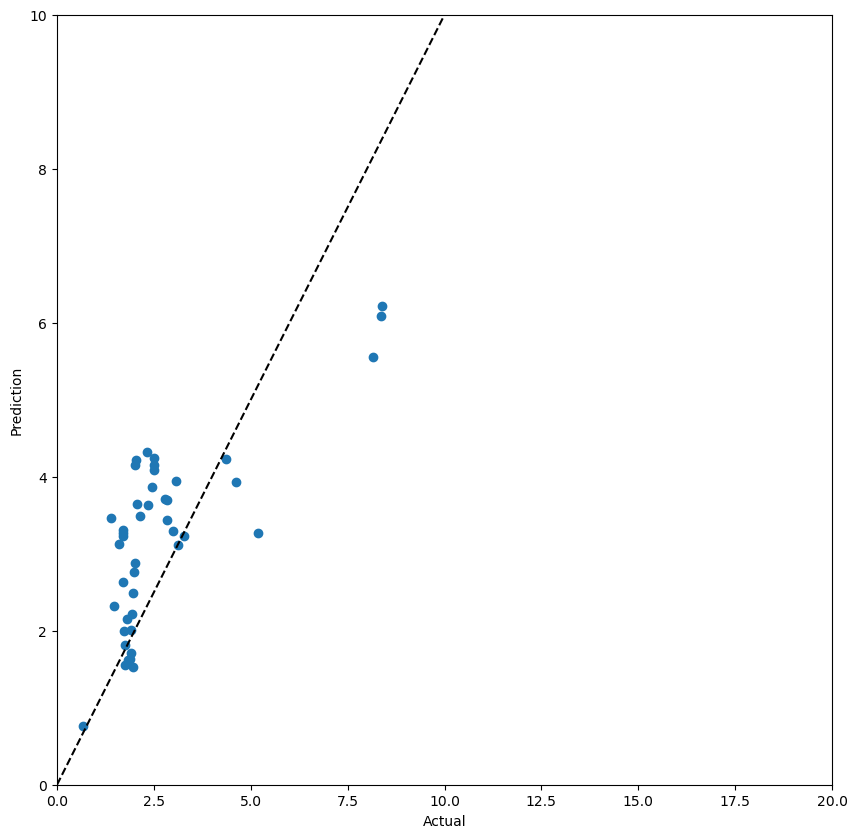

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(summary_test_pred["actual"], summary_test_pred["prediction"])
ax.plot([0, 30], [0, 30], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
plt.show()

#### **5.4. Analisis Error**

In [77]:
# Cari MSE
prediction_test_mse = mean_squared_error(y_test_pred, y_test['EFConsPerCap'])
print(prediction_test_mse)

284.9123365760802


In [78]:
# Cari perbandingan dengan baseline
comparison_mse = 100*(baseline_mse_2 - prediction_test_mse) / baseline_mse_2
print(f"MSE turun {comparison_mse:.2f} %")

MSE turun -4957.77 %


In [111]:
#menampilkan hasil regresi polinomial

#fitting dan transform data training
poly_features_test = poly.fit_transform(tes3)

In [112]:
#fitting ke regresi linear
poly_reg_model_test = LinearRegression()
poly_reg_model_test.fit(poly_features_test, y_test['EFConsPerCap'])

LinearRegression()

In [113]:
poly_reg_model_test.coef_

array([ 210.17821546, -599.70324622,  716.38178717, -295.90014272])

In [114]:
poly_reg_model_test.intercept_

-24.999577240473073